In [49]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [51]:
 pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages (20.2.2)
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install seaborn

In [53]:
## data analysis and wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

## visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## machine learning libraries
from sklearn.linear_model import LogisticRegression


In [54]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine = [train_df,test_df]


# analising data

In [55]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
train_df.info()
print("--"*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [59]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
train_df.describe(include=[ "O" ])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsen, Mr. Henry Margido",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


# analyse by pivoting features

In [61]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [62]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [63]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [64]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# analyse by visualising data

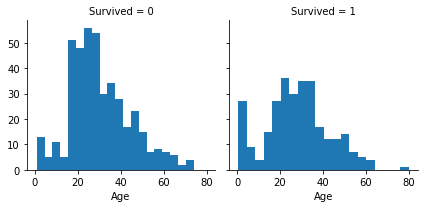

In [65]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)


c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


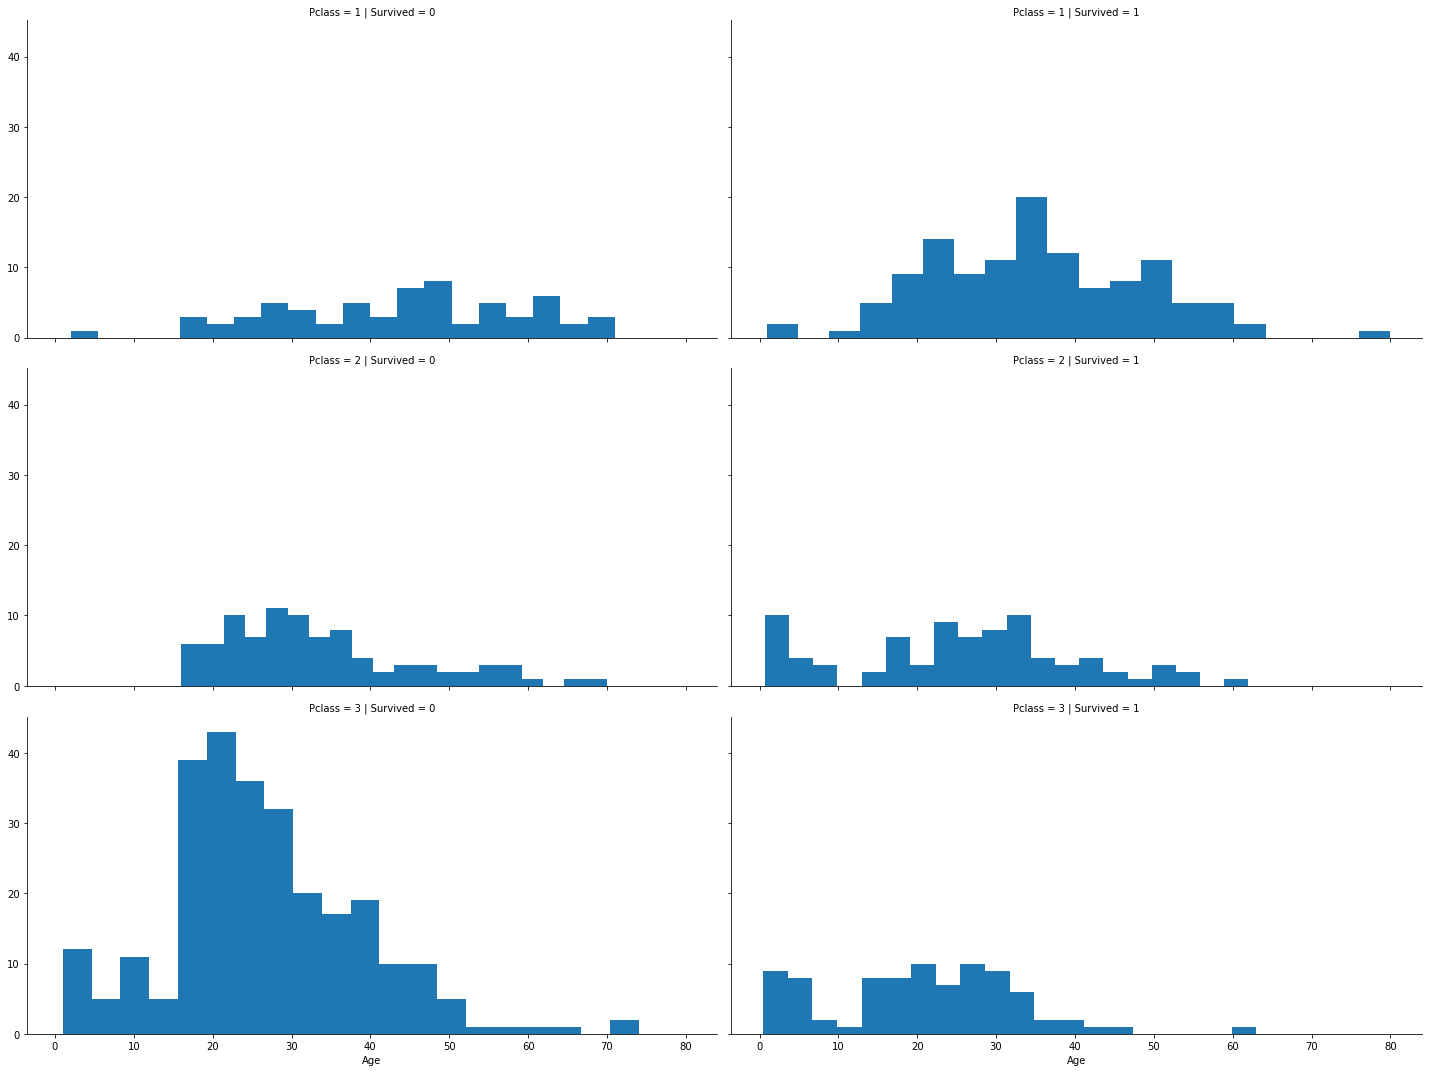

In [66]:
grid=sns.FacetGrid(train_df,col="Survived",row="Pclass",size=5,aspect=2)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


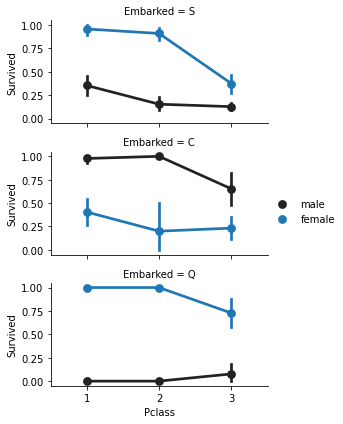

In [67]:
grid= sns.FacetGrid(train_df,"Embarked",size=2,aspect=2)
grid.map(sns.pointplot,"Pclass","Survived","Sex")
grid.add_legend()

c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


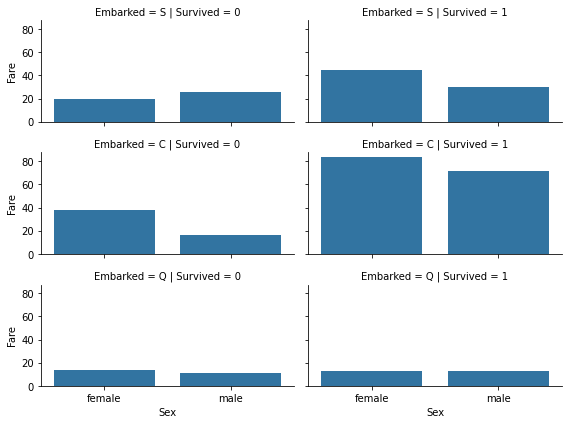

In [68]:
grid=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=2,aspect=2)
grid.map(sns.barplot,"Sex","Fare",ci=None)

# Wrangle data


In [69]:
print("before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape) 
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)
combine=[train_df,test_df]
print("after",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)


In [70]:
for data in combine:
    data["Title"]=data.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [85]:
for data in combine:
    data["Title"]=data["Title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Dona","Rev","Sir"],"Rare")

    data["Title"]=data["Title"].replace("Mlle","Miss")
    
    data["Title"]=data["Title"].replace("Ms","Miss")
    data["Title"]=data["Title"].replace("Mme","Mrs")

train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.625000
1,Miss,0.712963
2,Mr,0.239531
3,Rare,0.500000


In [86]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for data in combine:
    data["Title"]=data["Title"].map(title_mapping)
    data["Title"]=data["Title"].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [87]:
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
print(train_df.shape,test_df.shape)

(891, 9) (418, 9)


In [88]:
for data in combine:
    data["Sex"]=data["Sex"].map({"male":0,"female":1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,1


c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


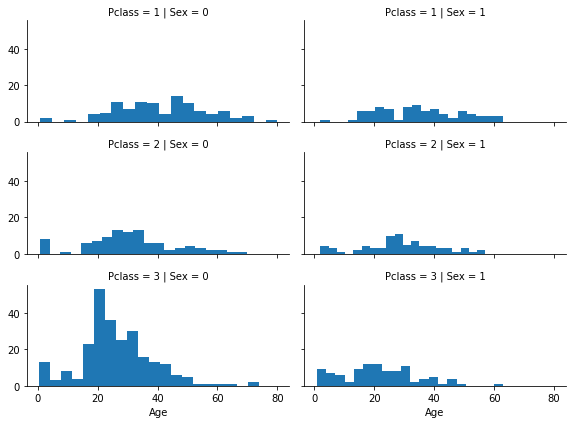

In [89]:
grid=sns.FacetGrid(train_df,row="Pclass",col="Sex",size=2,aspect=2)
grid.map(plt.hist,"Age",bins=20)
grid.add_legend()

In [90]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])